<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

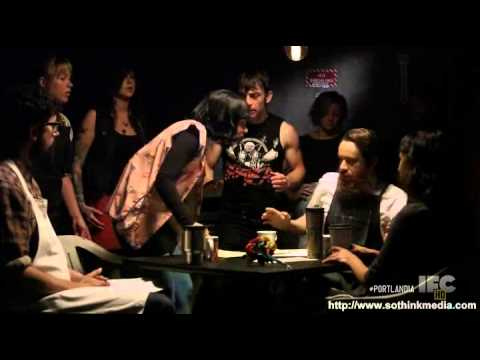

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/ngeorge/Desktop/Lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
shops.shape

(7616, 3)

In [5]:
shops['coffee_shop_name'].nunique()

79

In [6]:
# lets understand the distribution of these ratings per coffee shop
shops['coffee_shop_name'].value_counts(normalize=True)

Epoch Coffee                            0.052521
Halcyon                                 0.039391
The Factory - Cafe With a Soul          0.032038
Venezia Italian Gelato                  0.026261
Houndstooth Coffee                      0.026261
                                          ...   
Lucky Lab Coffee                        0.003283
Sister Coffee                           0.002232
Kowabunga Coffee                        0.002101
The Marvelous Vintage Tea Party Co.     0.001313
Lola Savannah Coffee Downtown           0.000525
Name: coffee_shop_name, Length: 79, dtype: float64

In [7]:
shops['coffee_shop_name'].unique()

array(['The Factory - Cafe With a Soul ',
       'The Marvelous Vintage Tea Party Co. ', 'Vintage Heart Coffee ',
       'Fleet Coffee ', 'Mozart’s Coffee Roasters ',
       'Summermoon Coffee Bar ', 'Monkey Nest Coffee ',
       'Apanas Coffee & Beer ', 'Corona Coffee ', 'Café Crème ',
       'Brian’s Brew ', 'Legend Coffee ', 'Venezia Italian Gelato ',
       'Epoch Coffee ', 'Houndstooth Coffee ', 'Caffé Medici ',
       'Flitch Coffee ', 'Caffe Medici ', 'Holy Grounds ',
       'Figure 8 Coffee Purveyors ', 'Mañana Coffee & Juice ',
       'Summer Moon Coffee Bar ', 'Fat Cats Organic Coffee And Dessert ',
       'Flat Track Coffee ', 'Mary’s Cafe ', 'Anderson’s Coffee Company ',
       'Flightpath Coffeehouse ', 'Third Coast Coffee Roasting Company ',
       'Bennu Coffee ', 'Dolce Neve ', 'Thunderbird Coffee ', 'Halcyon ',
       'Cherrywood Coffeehouse ', 'Jo’s Coffee ',
       'Arturo’s Underground Cafe ', 'Patika ', 'Cenote ',
       'The Hideout Coffeehouse ', 'Lucky Lab Coffe

In [8]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify as sq
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [9]:
# reviewing the raw text

shops['full_review_text']

0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
                              ...                        
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, Length: 7616, dtype: object

In [10]:
# tokenize and cleaning

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    # is this a letter between "a" and "z" lowercase, "A" and "Z" uppercase, or a number 0 to 9
    # if not, replace it with a space
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens'].head

<bound method NDFrame.head of 0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object>

In [11]:
# new simplified data frame
shops_token_df = shops[['full_review_text', 'tokens']]
shops_token_df.head()

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."


In [12]:
# lets analyze some tokens

# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops_token_df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(15)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546),
 ('it', 9379),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332)]

In [13]:
# making a data frame with these words

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
# using the word counts function to create word counts data frame
wc = count(shops_token_df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,the,6847,34809,1.0,0.044537,0.044537,0.899028
71,and,6864,26650,2.0,0.034098,0.078634,0.901261
49,a,6246,22755,3.0,0.029114,0.107748,0.820116
54,i,5528,20237,4.0,0.025892,0.133641,0.725840
43,to,5653,17164,5.0,0.021961,0.155601,0.742253


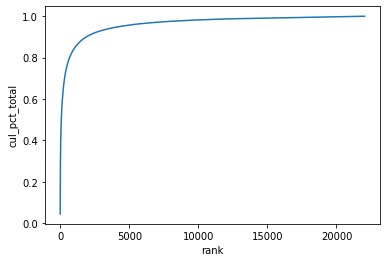

In [15]:
# cumulative distribution plot
import seaborn as sns

sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [16]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5335160399242049

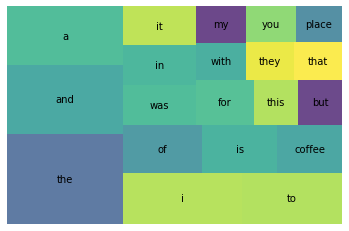

In [17]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [18]:
# with spacy
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['spacy_tokens'] = tokens

shops['spacy_tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: spacy_tokens, dtype: object

In [19]:
# apply word count function to data frame above

wc = count(shops['spacy_tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,the,6520,27779,1.0,0.034334,0.034334,0.856092
43,and,6804,25748,2.0,0.031824,0.066157,0.893382
30,,7616,22606,3.0,0.027940,0.094097,1.000000
9,a,6181,22085,4.0,0.027296,0.121394,0.811581
48,I,5469,19780,5.0,0.024447,0.145841,0.718093


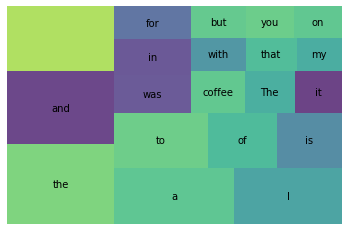

In [20]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [21]:
list(shops)

['coffee_shop_name',
 'full_review_text',
 'star_rating',
 'tokens',
 'spacy_tokens']

In [ ]:
# ok so lets get rid of some words using stop words

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spacy_tokens2'] = tokens


In [33]:
shops.tokens.head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

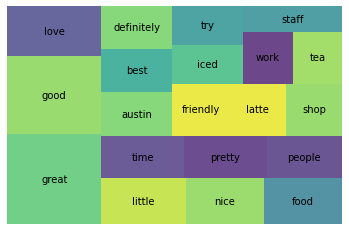

In [34]:
wc = count(shops['spacy_tokens2'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [35]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [47]:
STOP_WORDS = nlp.Defaults.stop_words.union(["didn't","&"," ","1", "it's", "like", "i've", "don't", "i'm", "-", "got", "place", "coffee", "coffee.", "check-in", "check-ins", "come", "it.", "you're", "definitely", "coffee,"])

In [48]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['spacy_tokens2'] = tokens

In [49]:
wc = count(shops['spacy_tokens2'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
152,great,2438,3250,1.0,0.008919,0.008919,0.320116
183,good,2084,2779,2.0,0.007626,0.016545,0.273634
20,love,1434,1806,3.0,0.004956,0.021501,0.188288
789,little,1230,1479,4.0,0.004059,0.025560,0.161502
164,nice,1188,1368,5.0,0.003754,0.029314,0.155987


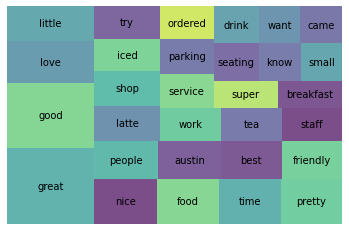

In [50]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7 )
plt.axis('off')
plt.show()

In [51]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if((token.is_stop ==False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

shops['lemmas'].head()

0    [ , 11/25/2016, 1, check, Love, love, love, at...
1    [ , 12/2/2016, list, Date, Night, Austin, Ambi...
2    [ , 11/30/2016, 1, check, list, Brunch, Spots,...
3    [ , 11/25/2016, cool, decor, good, drink, nice...
4    [ , 12/3/2016, 1, check, locate, Northcross, m...
Name: lemmas, dtype: object

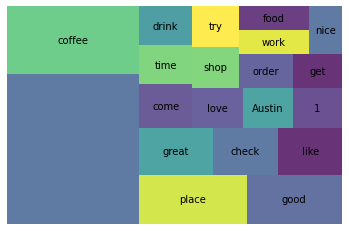

In [52]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [32]:
""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spacy_tokens'] = 

SyntaxError: invalid syntax (<ipython-input-32-16eba8a76c8f>, line 12)

In [ ]:
# lemmitzing the reviews

nlp = spacy.load("en_core_web_lg")

# calling reviews from the shops data frame
doc = nlp(reviews)

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

